# Predicting AC Prices
Dataset from Kaggle.com by the user Ahmed Gaitani

Link to dataset: https://www.kaggle.com/datasets/ahmedgaitani/air-conditioner-prices-dataset

Video explaining multiple regression:
https://www.youtube.com/watch?v=R2Zb5s_RrDU

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
df = pd.read_csv('/Users/vivianchung/Desktop/projects/air_conditioner_prices_dataset.csv')

In [81]:
df.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [83]:
df.duplicated().sum()

0

In [84]:
df['Brand'].unique()

array(['Brand A', 'Brand C', 'Brand B'], dtype=object)

In [85]:
df['Capacity (BTUs)'].unique()

array([18000,  8000, 15000, 12000, 10000])

In [86]:
df['Type'].unique()

array(['Portable', 'Window', 'Split'], dtype=object)

In [87]:
df['Location'].unique()

array(['India', 'USA', 'Europe', 'Australia'], dtype=object)

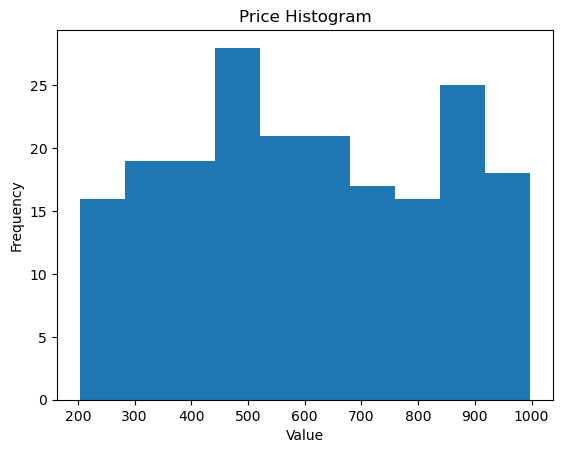

In [88]:
plt.hist(df['Price ($)'])
plt.title('Price Histogram') 
plt.xlabel('Value') 
plt.ylabel('Frequency')
plt.show()

> Bimodal distribution: data has two peaks or modes.

In [89]:
# encode categorical variables
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Type'] = le.fit_transform(df['Type'])
df['Features'] = le.fit_transform(df['Features'])
df['Location'] = le.fit_transform(df['Location'])

In [90]:
# define features and target
X = df[['Brand', 'Capacity (BTUs)', 'EER/SEER', 'Type', 'Features', 'Location', 'Age (years)']]
#X = df[['Capacity (BTUs)', 'EER/SEER', 'Age (years)']]
y = df['Price ($)']

In [91]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [93]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 52871.31004174151
R-squared: -0.049775671885272876


In [95]:
model.coef_

array([-10.40556231, -29.48393538,  -2.97489101,   3.73341609,
        11.25161755,  -9.91977766,  13.46965375])

In [96]:
model.intercept_

599.09375